In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### 0.Cleaning Dataset
#### 0.1 Large-scale solar PV dataframe

In [2]:
df = pd.read_csv('/Users/shentongli/Desktop/Gear Program/United States Large-Scale Solar Photovoltaic Database/United States Large-Scale Solar Photovoltaic Database (ver. 1.0, November 2023).csv')
df.head()

OID_  case_id multi_poly  eia_id p_state p_county       ylat      xlong  \
0     0   402964      multi   62365      MN   Wright  45.257500 -93.788399   
1     1   402893      multi   62210      MN   Dakota  44.542000 -92.971703   
2     2   402892      multi   62209      MN   Dakota  44.527100 -92.971802   
3     3   402796     single   62062      MN   Isanti  45.458500 -93.272400   
4     4   402774     single   62037      MN   Winona  44.114899 -91.791298   

   p_area  p_img_date  ...  p_tech_sec       p_axis  p_azimuth p_tilt  \
0   92600    20220310  ...        c-si  single-axis        180    NaN   
1   93358    20220313  ...        c-si   fixed-tilt        180    0.0   
2   93795    20220313  ...        c-si   fixed-tilt        180    0.0   
3  123941    20220401  ...        c-si   fixed-tilt        180    NaN   
4   89591    20210616  ...        c-si   fixed-tilt        180   30.0   

  p_battery p_cap_ac p_cap_dc      p_type       p_agrivolt  p_zscore  
0       NaN     5.00      7.0  greenfield  non-agrivoltaic  0.142344  
1       NaN     5.00      6.5  greenfield  non-agrivoltaic  0.003859  
2       NaN     5.00      6.5  greenfield  non-agrivoltaic -0.003666  
3       NaN     6.62      8.8  greenfield  non-agrivoltaic  0.035805  
4       NaN     4.80      7.0  greenfield  non-agrivoltaic  0.201243  

[5 rows x 25 columns]

In [3]:
df.isna().sum()

OID_             0
case_id          0
multi_poly       0
eia_id           0
p_state          0
p_county         0
ylat             0
xlong            0
p_area           0
p_img_date       0
p_dig_conf       0
p_name           0
p_year           0
p_pwr_reg       14
p_tech_pri       0
p_tech_sec       0
p_axis         263
p_azimuth        0
p_tilt         434
p_battery     3596
p_cap_ac         0
p_cap_dc         0
p_type           0
p_agrivolt       0
p_zscore         0
dtype: int64

In [4]:
df['p_tilt'] = df['p_tilt'].fillna(df['p_tilt'].median())

In [5]:
most_frequent_p_axis = df['p_axis'].mode()[0] 
df['p_axis'] = df['p_axis'].fillna(most_frequent_p_axis)

In [6]:
df[['xlong', 'ylat']].isnull().any()

xlong    False
ylat     False
dtype: bool

#### Environemental factor dataframe

In [7]:
df_spg = pd.read_csv('/Users/shentongli/Desktop/Gear Program/United States Large-Scale Solar Photovoltaic Database/spg.csv')
df_spg.head()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
0                       2.17                               31   
1                       2.31                               27   
2                       3.65                               33   
3                       5.82                               30   
4                       7.73                               27   

   mean_sea_level_pressure_MSL  total_precipitation_sfc  snowfall_amount_sfc  \
0                       1035.0                      0.0                  0.0   
1                       1035.1                      0.0                  0.0   
2                       1035.4                      0.0                  0.0   
3                       1035.4                      0.0                  0.0   
4                       1034.4                      0.0                  0.0   

   total_cloud_cover_sfc  high_cloud_cover_high_cld_lay  \
0                    0.0                              0   
1                    0.0                              0   
2                    0.0                              0   
3                    0.0                              0   
4                    0.0                              0   

   medium_cloud_cover_mid_cld_lay  low_cloud_cover_low_cld_lay  \
0                               0                            0   
1                               0                            0   
2                               0                            0   
3                               0                            0   
4                               0                            0   

   shortwave_radiation_backwards_sfc  ...  wind_direction_10_m_above_gnd  \
0                               0.00  ...                         312.71   
1                               1.78  ...                         294.78   
2                             108.58  ...                         270.00   
3                             258.10  ...                         323.13   
4                             375.58  ...                          10.01   

   wind_speed_80_m_above_gnd  wind_direction_80_m_above_gnd  \
0                       9.36                          22.62   
1                       5.99                          32.74   
2                       3.89                          56.31   
3                       3.55                          23.96   
4                       6.76                          25.20   

   wind_speed_900_mb  wind_direction_900_mb  wind_gust_10_m_above_gnd  \
0               6.62                 337.62                     24.48   
1               4.61                 321.34                     21.96   
2               3.76                 286.70                     14.04   
3               3.08                 339.44                     19.80   
4               6.62                  22.38                     16.56   

   angle_of_incidence     zenith    azimuth  generated_power_kw  
0           58.753108  83.237322  128.33543           454.10095  
1           45.408585  75.143041  139.65530          1411.99940  
2           32.848282  68.820648  152.53769          2214.84930  
3           22.699288  64.883536  166.90159          2527.60920  
4           19.199908  63.795208  182.13526          2640.20340  

[5 rows x 21 columns]

In [8]:
df_spg.describe()

temperature_2_m_above_gnd  relative_humidity_2_m_above_gnd  \
count                4213.000000                      4213.000000   
mean                   15.068111                        51.361025   
std                     8.853677                        23.525864   
min                    -5.350000                         7.000000   
25%                     8.390000                        32.000000   
50%                    14.750000                        48.000000   
75%                    21.290000                        70.000000   
max                    34.900000                       100.000000   

       mean_sea_level_pressure_MSL  total_precipitation_sfc  \
count                  4213.000000              4213.000000   
mean                   1019.337812                 0.031759   
std                       7.022867                 0.170212   
min                     997.500000                 0.000000   
25%                    1014.500000                 0.000000   
50%                    1018.100000                 0.000000   
75%                    1023.600000                 0.000000   
max                    1046.800000                 3.200000   

       snowfall_amount_sfc  total_cloud_cover_sfc  \
count          4213.000000            4213.000000   
mean              0.002808              34.056990   
std               0.038015              42.843638   
min               0.000000               0.000000   
25%               0.000000               0.000000   
50%               0.000000               8.700000   
75%               0.000000             100.000000   
max               1.680000             100.000000   

       high_cloud_cover_high_cld_lay  medium_cloud_cover_mid_cld_lay  \
count                    4213.000000                     4213.000000   
mean                       14.458818                       20.023499   
std                        30.711707                       36.387948   
min                         0.000000                        0.000000   
25%                         0.000000                        0.000000   
50%                         0.000000                        0.000000   
75%                         9.000000                       10.000000   
max                       100.000000                      100.000000   

       low_cloud_cover_low_cld_lay  shortwave_radiation_backwards_sfc  ...  \
count                  4213.000000                        4213.000000  ...   
mean                     21.373368                         387.759036  ...   
std                      38.013885                         278.459293  ...   
min                       0.000000                           0.000000  ...   
25%                       0.000000                         142.400000  ...   
50%                       0.000000                         381.810000  ...   
75%                      10.000000                         599.860000  ...   
max                     100.000000                         952.300000  ...   

       wind_direction_10_m_above_gnd  wind_speed_80_m_above_gnd  \
count                    4213.000000                4213.000000   
mean                      195.078452                  18.978483   
std                       106.626782                  11.999960   
min                         0.540000                   0.000000   
25%                       153.190000                  10.140000   
50%                       191.770000                  16.240000   
75%                       292.070000                  26.140000   
max                       360.000000                  66.880000   

       wind_direction_80_m_above_gnd  wind_speed_900_mb  \
count                    4213.000000         4213.00000   
mean                      191.166862           16.36319   
std                       108.760021            9.88533   
min                         1.120000            0.00000   
25%                       130.240000            9.18000   
50%                       187

In [9]:
columns_to_standardize = [
    'temperature_2_m_above_gnd',
    'mean_sea_level_pressure_MSL',
    'wind_speed_10_m_above_gnd',
    'wind_speed_80_m_above_gnd',
    'wind_speed_900_mb',
    'wind_gust_10_m_above_gnd'
]

# Columns to normalize
columns_to_normalize = [
    'relative_humidity_2_m_above_gnd',
    'total_precipitation_sfc',
    'snowfall_amount_sfc',
    'total_cloud_cover_sfc',
    'high_cloud_cover_high_cld_lay',
    'medium_cloud_cover_mid_cld_lay',
    'low_cloud_cover_low_cld_lay',
    'shortwave_radiation_backwards_sfc'
]

# Standardizing selected columns
scaler = StandardScaler()
df_spg[columns_to_standardize] = scaler.fit_transform(df_spg[columns_to_standardize])

# Normalizing selected columns
min_max_scaler = MinMaxScaler()
df_spg[columns_to_normalize] = min_max_scaler.fit_transform(df_spg[columns_to_normalize])

# Handling cyclical wind direction with sine and cosine transformation
for col in ['wind_direction_10_m_above_gnd', 'wind_direction_80_m_above_gnd', 'wind_direction_900_mb']:
    radians = np.radians(df_spg[col])
    df_spg[col + '_sin'] = np.sin(radians)
    df_spg[col + '_cos'] = np.cos(radians)
    df_spg.drop(col, axis=1, inplace=True)  # Drop original wind direction columns after transformation


In [10]:
df_spg.isna().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_speed_80_m_above_gnd            0
wind_speed_900_mb                    0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
wind_direction_10_m_above_gnd_sin    0
wind_direction_10_m_above_gnd_cos    0
wind_direction_80_m_above_gnd_sin    0
wind_direction_80_m_above_gnd_cos    0
wind_direction_900_mb_sin            0
wind_direction_900_mb_cos            0
dtype: int64

### 1. Geographic Impact on Solar Farm Efficiency
#### 1.1  Spatial Analysis

In [11]:
# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.xlong, df.ylat))

# Create a base map 
m = folium.Map(location=[45, -93], zoom_start=6)  

# Add points (solar farms)
for idx, row in gdf.iterrows():
    folium.CircleMarker([row['ylat'], row['xlong']],
                        radius=3,
                        weight=1.5,
                        color='blue',
                        fill_color='red',
                        fill=True,
                        fill_opacity=0.5,
                        popup=f"AC: {row['p_cap_ac']}, DC: {row['p_cap_dc']}"
                       ).add_to(m)

# Display the map
m


/Users/shentongli/opt/anaconda3/envs/dsc80/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shentongli/opt/anaconda3/envs/dsc80/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shentongli/opt/anaconda3/envs/dsc80/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


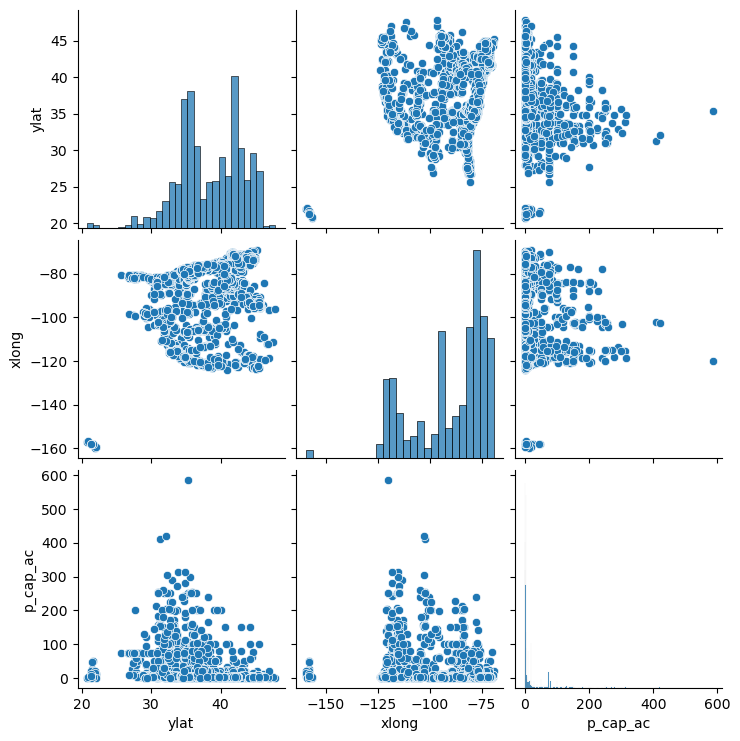

In [12]:
# Pairplot for latitude, longitude, and AC Power Capacity
sns.pairplot(gdf[['ylat', 'xlong', 'p_cap_ac']])
plt.show()

/Users/shentongli/opt/anaconda3/envs/dsc80/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shentongli/opt/anaconda3/envs/dsc80/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/shentongli/opt/anaconda3/envs/dsc80/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


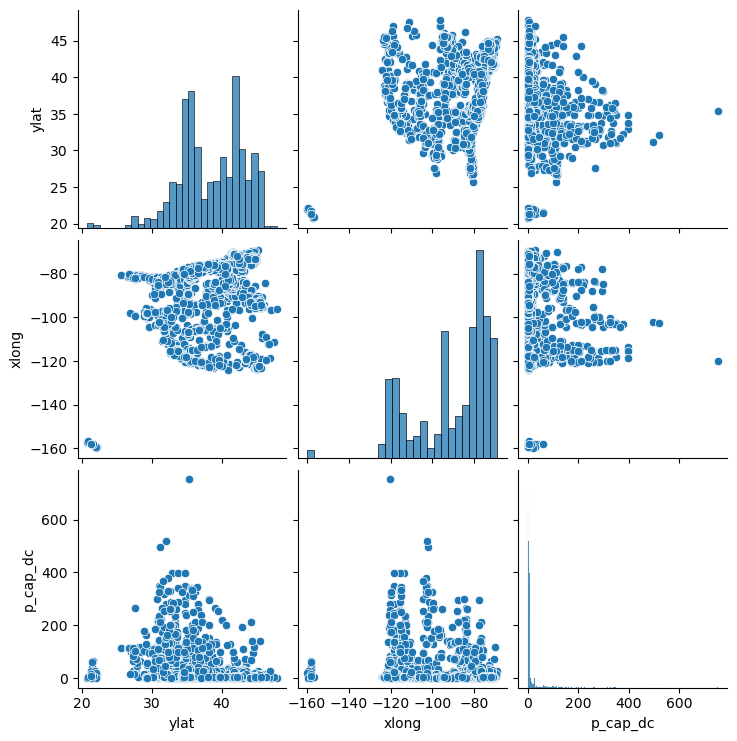

In [13]:
# Pairplot for latitude, longitude, and DC Power Capacity
sns.pairplot(gdf[['ylat', 'xlong', 'p_cap_dc']])
plt.show()

In [14]:
correlation_matrix = gdf[['ylat', 'xlong', 'p_cap_ac', 'p_cap_dc']].corr()
correlation_matrix

ylat     xlong  p_cap_ac  p_cap_dc
ylat      1.000000  0.247557 -0.308155 -0.313659
xlong     0.247557  1.000000 -0.193131 -0.185971
p_cap_ac -0.308155 -0.193131  1.000000  0.997172
p_cap_dc -0.313659 -0.185971  0.997172  1.000000

- Latitude (`ylat`) and Power Capacity: The correlation between latitude and both AC and DC power capacity is slightly negative (-0.308155 for AC and -0.313659 for DC). This suggests that as we move north (increasing latitude), there is a slight tendency for the power capacity of the solar farms to decrease. However, the correlation is not very strong, so other factors likely play a significant role in determining power capacity.

- Longitude (`xlong`) and Power Capacity: There is also a negative correlation between longitude and both AC and DC power capacity (-0.193131 for AC and -0.185971 for DC), but it is weaker than the correlation with latitude. This implies a slight decrease in power capacity as the longitude increases (moving west), but again, this is a weak relationship.

- AC and DC Power Capacity (`p_cap_ac` and `p_cap_dc`): The correlation between AC and DC power capacity is very high (0.997172), indicating that solar farms with a higher DC capacity also tend to have a higher AC capacity. This is expected since the AC capacity is derived from the DC capacity after accounting for the efficiency of the inverter.

#### 1.2 Environmental Correlation

In [15]:
correlation_matrix = df_spg.corr()
power_correlations = correlation_matrix['generated_power_kw'].sort_values(ascending=False)
power_correlations

generated_power_kw                   1.000000
shortwave_radiation_backwards_sfc    0.556148
temperature_2_m_above_gnd            0.217280
mean_sea_level_pressure_MSL          0.150551
wind_direction_900_mb_sin            0.083375
wind_direction_10_m_above_gnd_sin    0.076727
wind_direction_80_m_above_gnd_sin    0.067090
wind_direction_10_m_above_gnd_cos    0.053603
wind_direction_900_mb_cos            0.052037
wind_direction_80_m_above_gnd_cos    0.014219
snowfall_amount_sfc                 -0.049508
azimuth                             -0.061184
wind_speed_10_m_above_gnd           -0.083043
wind_speed_900_mb                   -0.107615
total_precipitation_sfc             -0.118442
wind_gust_10_m_above_gnd            -0.122808
high_cloud_cover_high_cld_lay       -0.147723
wind_speed_80_m_above_gnd           -0.157899
medium_cloud_cover_mid_cld_lay      -0.227834
low_cloud_cover_low_cld_lay         -0.288066
total_cloud_cover_sfc               -0.334338
relative_humidity_2_m_above_gnd   

In [16]:
df_spg_new = df_spg[['shortwave_radiation_backwards_sfc', 'temperature_2_m_above_gnd', 'mean_sea_level_pressure_MSL', 'zenith', 'angle_of_incidence', 'relative_humidity_2_m_above_gnd', 'total_cloud_cover_sfc', 'low_cloud_cover_low_cld_lay', 'medium_cloud_cover_mid_cld_lay', 'high_cloud_cover_high_cld_lay']]
correlation_matrix_new = df_spg_new.corr()

<Axes: >

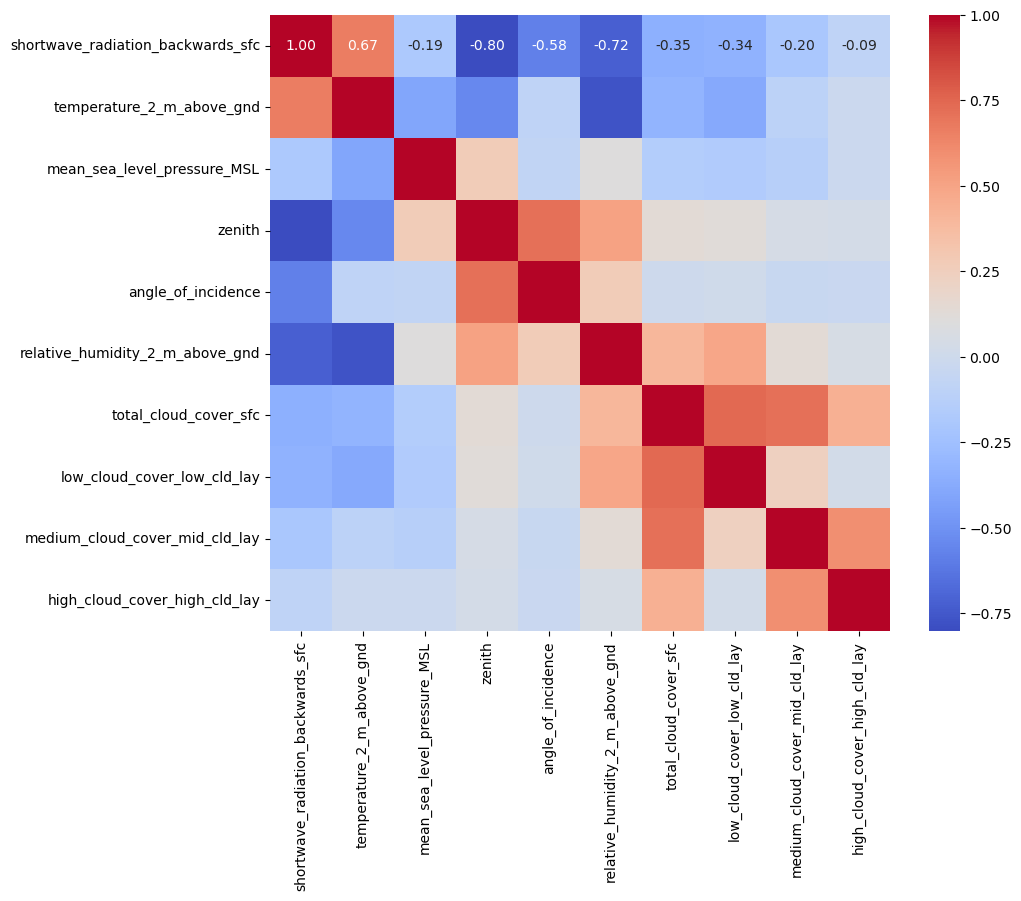

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_new, annot=True, fmt=".2f", cmap='coolwarm')


In [18]:
X = df_spg[['shortwave_radiation_backwards_sfc', 'temperature_2_m_above_gnd', 'mean_sea_level_pressure_MSL', 'zenith', 'angle_of_incidence', 'relative_humidity_2_m_above_gnd', 'total_cloud_cover_sfc', 'low_cloud_cover_low_cld_lay', 'medium_cloud_cover_mid_cld_lay', 'high_cloud_cover_high_cld_lay']]
y = df_spg['generated_power_kw']

In [19]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     generated_power_kw   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     689.5
Date:                Fri, 09 Feb 2024   Prob (F-statistic):               0.00
Time:                        10:14:14   Log-Likelihood:                -32764.
No. Observations:                4213   AIC:                         6.555e+04
Df Residuals:                    4202   BIC:                         6.562e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              3409.4961     85.855     39.712      0.000    3241.174    3577.818
shortwave_radiation_backwards_sfc  -130.6920     68.789     -1.900      0.058    -265.555       4.171
temperature_2_m_above_gnd           -69.3204     19.058     -3.637      0.000    -106.684     -31.957
mean_sea_level_pressure_MSL         176.2827     11.327     15.563      0.000     154.075     198.490
zenith                              -26.8810      1.010    -26.617      0.000     -28.861     -24.901
angle_of_incidence                   -9.6648      0.617    -15.665      0.000     -10.874      -8.455
relative_humidity_2_m_above_gnd     205.6469     68.678      2.994      0.003      71.002     340.291
total_cloud_cover_sfc              -150.2098     58.936     -2.549      0.011    -265.756     -34.664
low_cloud_cover_low_cld_lay        -449.8586     50.301     -8.943      0.000    -548.475    -351.243
medium_cloud_cover_mid_cld_lay     -209.6946     46.627     -4.497      0.000    -301.107    -118.282
high_cloud_cover_high_cld_lay      -187.0637     38.557     -4.852      0.000    -262.656    -111.472
==============================================================================
Omnibus:                       51.682   Durbin-Watson:                   0.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.930
Skew:                          -0.267   Prob(JB):                     3.21e-12
Kurtosis:                       2.869   Cond. No.                     1.08e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- The R-squared value of 0.621 indicates that approximately 62.1% of the variability in generated power can be explained by the model's inputs. This is a relatively strong fit for a real-world regression model.
- The F-statistic and its associated p-value (Prob (F-statistic)) are essentially 0, indicating the model as a whole is statistically significant.
- `mean_sea_level_pressure_MSL`, `zenith`, `angle_of_incidence`, `relative_humidity_2_m_above_gnd`, `total_cloud_cover_sfc`, `low_cloud_cover_low_cld_lay`, `medium_cloud_cover_mid_cld_lay`, and `high_cloud_cover_high_cld_lay` all have p-values less than 0.05, suggesting they are significant predictors of generated power.

#### 1.3  State and County Trends

In [20]:
df.head()

OID_  case_id multi_poly  eia_id p_state p_county       ylat      xlong  \
0     0   402964      multi   62365      MN   Wright  45.257500 -93.788399   
1     1   402893      multi   62210      MN   Dakota  44.542000 -92.971703   
2     2   402892      multi   62209      MN   Dakota  44.527100 -92.971802   
3     3   402796     single   62062      MN   Isanti  45.458500 -93.272400   
4     4   402774     single   62037      MN   Winona  44.114899 -91.791298   

   p_area  p_img_date  ...  p_tech_sec       p_axis  p_azimuth p_tilt  \
0   92600    20220310  ...        c-si  single-axis        180   20.0   
1   93358    20220313  ...        c-si   fixed-tilt        180    0.0   
2   93795    20220313  ...        c-si   fixed-tilt        180    0.0   
3  123941    20220401  ...        c-si   fixed-tilt        180   20.0   
4   89591    20210616  ...        c-si   fixed-tilt        180   30.0   

  p_battery p_cap_ac p_cap_dc      p_type       p_agrivolt  p_zscore  
0       NaN     5.00      7.0  greenfield  non-agrivoltaic  0.142344  
1       NaN     5.00      6.5  greenfield  non-agrivoltaic  0.003859  
2       NaN     5.00      6.5  greenfield  non-agrivoltaic -0.003666  
3       NaN     6.62      8.8  greenfield  non-agrivoltaic  0.035805  
4       NaN     4.80      7.0  greenfield  non-agrivoltaic  0.201243  

[5 rows x 25 columns]

In [21]:
# average AC and DC capacities by state and county
avg_efficiency = df.groupby(['p_state', 'p_county']).agg(
    avg_cap_ac=('p_cap_ac', 'mean'),
    avg_cap_dc=('p_cap_dc', 'mean'),
    count=('OID_', 'count')
).reset_index()

avg_efficiency

p_state     p_county  avg_cap_ac  avg_cap_dc  count
0        AL      Calhoun        7.40         9.7      1
1        AL     Chambers       79.20       116.9      1
2        AL      Colbert      227.00       294.0      1
3        AL         Dale       10.60        12.7      1
4        AL   Lauderdale       75.00       100.2      1
..      ...          ...         ...         ...    ...
835      WI    St. Croix        2.20         2.9      1
836      WI       Taylor        2.00         2.5      1
837      WI  Trempealeau        5.00         6.8      1
838      WI       Vernon        1.05         1.4      2
839      WY   Sweetwater       80.00        98.0      1

[840 rows x 5 columns]

In [22]:
sorted_by_ac = avg_efficiency.sort_values('avg_cap_ac', ascending=False)
print("Top states/counties by average AC capacity:")
print(sorted_by_ac.head(10))

print("\nBottom states/counties by average AC capacity:")
print(sorted_by_ac.tail(10))


Top states/counties by average AC capacity:
    p_state   p_county  avg_cap_ac  avg_cap_dc  count
711      TX    Andrews  268.575000  340.800000      4
752      TX      Upton  249.166667  314.666667      3
719      TX  Childress  240.000000  326.800000      1
2        AL    Colbert  227.000000  294.000000      1
714      TX     Borden  225.000000  287.000000      1
723      TX  Culberson  220.000000  311.000000      2
745      TX      Nolan  204.400000  280.000000      1
737      TX      Jones  200.000000  261.100000      1
269      IN   Randolph  200.000000  220.000000      1
211      IL      Coles  200.000000  255.000000      1

Bottom states/counties by average AC capacity:
    p_state      p_county  avg_cap_ac  avg_cap_dc  count
80       CO       Jackson         1.0         1.3      1
701      SD        Hughes         1.0         1.3      1
373      MN      Red Lake         1.0         1.0      1
151      GA        DeKalb         1.0         1.0      1
429      NC      Cherokee    

In [23]:
sorted_by_dc = avg_efficiency.sort_values('avg_cap_dc', ascending=False)
print("\nTop states/counties by average DC capacity:")
print(sorted_by_dc.head(10))

print("\nBottom states/counties by average DC capacity:")
print(sorted_by_dc.tail(10))


Top states/counties by average DC capacity:
    p_state   p_county  avg_cap_ac  avg_cap_dc  count
711      TX    Andrews  268.575000  340.800000      4
719      TX  Childress  240.000000  326.800000      1
752      TX      Upton  249.166667  314.666667      3
723      TX  Culberson  220.000000  311.000000      2
2        AL    Colbert  227.000000  294.000000      1
714      TX     Borden  225.000000  287.000000      1
745      TX      Nolan  204.400000  280.000000      1
750      TX  Tom Green  200.000000  266.000000      1
602      OH      Brown  200.000000  265.000000      1
737      TX      Jones  200.000000  261.100000      1

Bottom states/counties by average DC capacity:
    p_state     p_county  avg_cap_ac  avg_cap_dc  count
527      NM        Grant         1.0         1.1      1
530      NM   Los Alamos         1.0         1.1      1
86       CO     Montrose         1.0         1.1      1
186      GA        Upson         1.0         1.0      1
46       CA       Placer         

/var/folders/h0/8gdh0lxd4ynbp3ypwp6nwxmc0000gn/T/ipykernel_30056/3881416120.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='avg_cap_ac', y='p_state', data=avg_efficiency.sort_values('avg_cap_ac', ascending=False), ci=None)


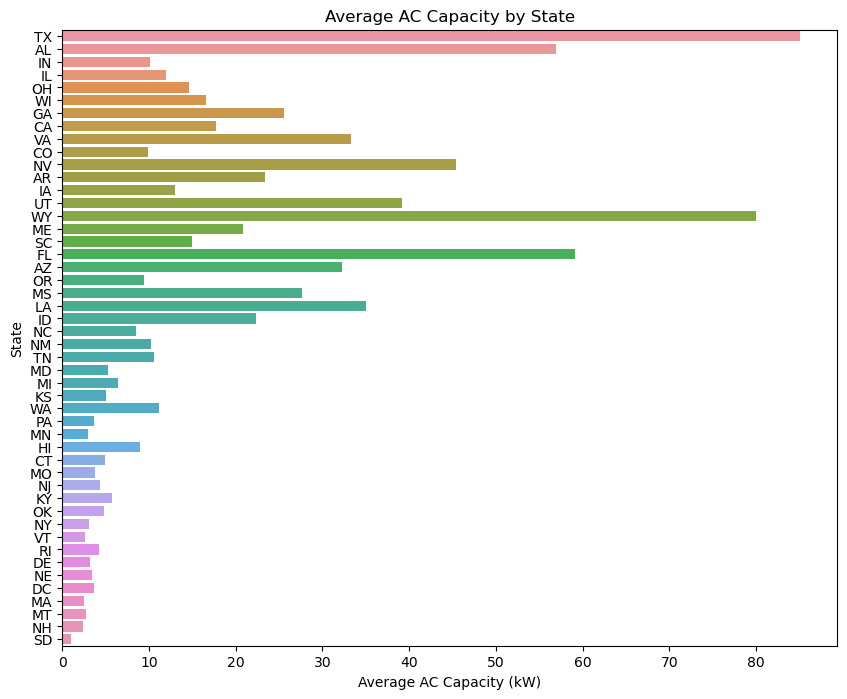

In [29]:
# Visualization of average AC capacity by state
plt.figure(figsize=(10, 8))
sns.barplot(x='avg_cap_ac', y='p_state', data=avg_efficiency.sort_values('avg_cap_ac', ascending=False), ci=None)
plt.title('Average AC Capacity by State')
plt.xlabel('Average AC Capacity (kW)')
plt.ylabel('State')
plt.show()

/var/folders/h0/8gdh0lxd4ynbp3ypwp6nwxmc0000gn/T/ipykernel_30056/1849889826.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='avg_cap_dc', y='p_state', data=avg_efficiency.sort_values('avg_cap_dc', ascending=False), ci=None)


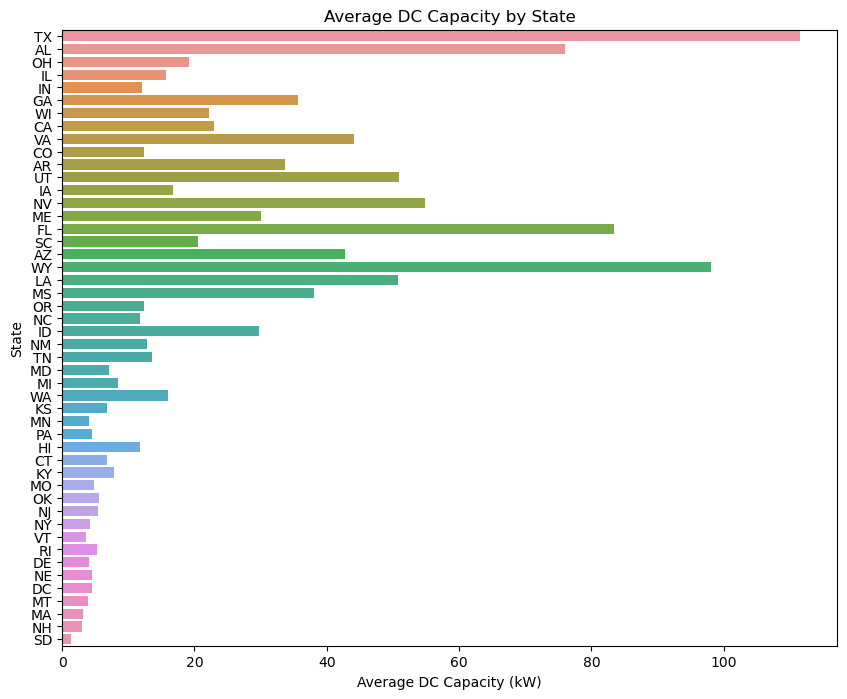

In [31]:
# Visualization of average DC capacity by state
plt.figure(figsize=(10, 8))
sns.barplot(x='avg_cap_dc', y='p_state', data=avg_efficiency.sort_values('avg_cap_dc', ascending=False), ci=None)
plt.title('Average DC Capacity by State')
plt.xlabel('Average DC Capacity (kW)')
plt.ylabel('State')
plt.show()

> According to the Solar Energy Industries Association (SEIA), Texas Governor Greg Abbott signed a series of pro-solar bills into law, which are beneficial to the Texas solar industry. These bills include:
- SB 398: This bill helps to clarify rules around the decommissioning of solar sites, providing clear guidelines for how solar farms should be decommissioned, which can help in planning and investment decisions.
- SB 63: This bill is part of the legislative package aimed at supporting the solar industry, although the specific benefits of this bill were not detailed in the summary provided.
- SB 760: Along with the others, this bill strengthens consumer protection, ensuring that the rights of consumers are better protected in the context of solar energy.